In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
print(tf.__version__)

2.0.0


In [6]:
data = pd.read_csv("data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.shape

(284807, 31)

In [8]:
# Checking any Null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Here we have pretty inballanced data. 284315 False and only 492 True.
data["Class"].value_counts() 

0    284315
1       492
Name: Class, dtype: int64

### Balance Data

In [11]:
non_fraud = data[data["Class"] == 0]
fraud = data[data["Class"] == 1]

In [12]:
non_fraud, fraud

(            Time         V1         V2        V3        V4        V5  \
 0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
 1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
 2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
 3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
 4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
 ...          ...        ...        ...       ...       ...       ...   
 284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
 284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
 284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
 284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
 284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   
 
               V6        V7        V8        V9  ...       V21       V22  \
 0       0.462388  0.239599  0.098698  0.36378

In [13]:
# Selecting only 492 random non fraud data to balance our dataset.
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [14]:
# Merging both Fraud and Non Fraud dataset.
data = fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,142856.0,1.747229,-1.696493,-0.851385,-0.759810,-1.123251,-0.114221,-0.770567,0.061305,0.062815,...,-0.075889,-0.671669,0.195242,-0.605609,-0.570051,-0.575057,-0.037118,-0.025717,212.64,0
980,152836.0,-0.027337,0.508518,0.800399,-0.105142,-0.532230,-0.063714,0.137582,0.202320,0.684735,...,0.155407,0.524334,0.138131,-0.121423,-1.118632,-0.518090,0.105572,0.130091,71.03,0
981,53697.0,-0.154129,0.548627,0.957852,-0.676770,-0.515451,-0.380852,-1.047705,-2.718670,0.260373,...,-1.357283,0.260286,-0.270554,0.492858,0.699752,0.972608,0.004415,0.229842,1.00,0
982,48802.0,-0.502613,0.054146,0.269257,-1.425836,2.343834,3.435966,-0.415611,0.948882,0.470697,...,-0.208566,-0.548783,-0.256477,1.024597,0.491916,-0.452496,0.139990,0.087271,0.00,0


In [16]:
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [17]:
x = data.drop("Class", axis=1)
y = data["Class"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0, stratify=y)

In [19]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [21]:
# Mininzing the Variance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [24]:
x_train.shape, x_train.shape[0], x_train.shape[1]

((787, 30), 787, 30)

In [25]:
# Since CNN understands 3D data, converting our data to 3D.
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [26]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

## Build CNN

In [27]:
epochs = 20
model = Sequential()

# Layer 1
model.add(Conv1D(32, 2, activation="relu", input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Layer 2
model.add(Conv1D(64, 2, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Layer 3
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

# Layer 4
model.add(Dense(1, activation="sigmoid"))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [30]:
model.compile(optimizer=Adam(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [31]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Train on 787 samples, validate on 197 samples
Epoch 1/20
787/787 [==============================] - 7s 9ms/sample - loss: 0.7581 - accuracy: 0.6734 - val_loss: 0.6042 - val_accuracy: 0.8071
Epoch 2/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.4552 - accuracy: 0.8069 - val_loss: 0.5518 - val_accuracy: 0.8680
Epoch 3/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.3838 - accuracy: 0.8526 - val_loss: 0.5084 - val_accuracy: 0.8985
Epoch 4/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.2941 - accuracy: 0.8920 - val_loss: 0.4637 - val_accuracy: 0.9086
Epoch 5/20
787/787 [==============================] - 1s 2ms/sample - loss: 0.2846 - accuracy: 0.8996 - val_loss: 0.4245 - val_accuracy: 0.9239
Epoch 6/20
787/787 [==============================] - 1s 1ms/sample - loss: 0.2973 - accuracy: 0.8933 - val_loss: 0.3890 - val_accuracy: 0.9340
Epoch 7/20
787/787 [==============================] - 1s 2ms/sample - loss: 0.2557 - accur

In [32]:
epoch_range = range(1, epochs+1)

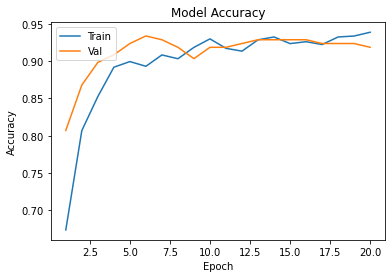

In [33]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

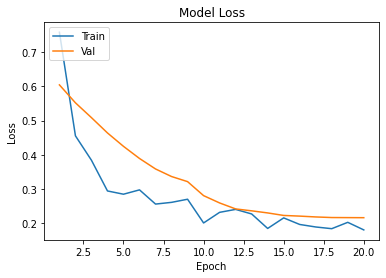

In [34]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

#### The above model has accuracy more than the val_accuracy and it is overfitting. So adding Maxpool and increasing the Epochs so that the both accuracy are close enough.

## Adding Maxpool and Increasing Epochs

In [41]:
epochs = 50
model = Sequential()

# Layer 1
model.add(Conv1D(32, 2, activation="relu", input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

# Layer 2
model.add(Conv1D(64, 2, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

# Layer 3
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))

# Layer 4
model.add(Dense(1, activation="sigmoid"))

In [42]:
model.compile(optimizer=Adam(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [43]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Train on 787 samples, validate on 197 samples
Epoch 1/50
787/787 [==============================] - 6s 8ms/sample - loss: 0.9145 - accuracy: 0.5820 - val_loss: 0.6639 - val_accuracy: 0.6853
Epoch 2/50
787/787 [==============================] - 1s 1ms/sample - loss: 0.8510 - accuracy: 0.6341 - val_loss: 0.6393 - val_accuracy: 0.7716
Epoch 3/50
787/787 [==============================] - 1s 2ms/sample - loss: 0.6653 - accuracy: 0.6963 - val_loss: 0.6106 - val_accuracy: 0.7563
Epoch 4/50
787/787 [==============================] - 1s 1ms/sample - loss: 0.6239 - accuracy: 0.7370 - val_loss: 0.5817 - val_accuracy: 0.7411
Epoch 5/50
787/787 [==============================] - 1s 1ms/sample - loss: 0.6053 - accuracy: 0.7560 - val_loss: 0.5508 - val_accuracy: 0.7360
Epoch 6/50
787/787 [==============================] - 1s 1ms/sample - loss: 0.5379 - accuracy: 0.7726 - val_loss: 0.5209 - val_accuracy: 0.7716
Epoch 7/50
787/787 [==============================] - 1s 1ms/sample - loss: 0.5117 - accur

In [44]:
epoch_range = range(1, epochs+1)

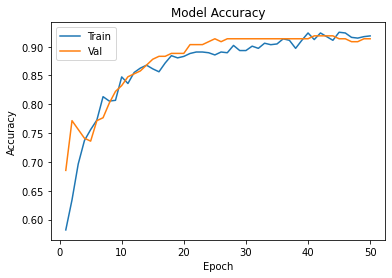

In [45]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

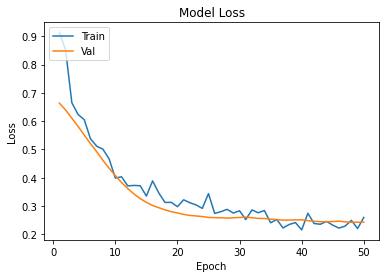

In [46]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()